<a href="https://colab.research.google.com/github/danisshai/fastai-tests/blob/main/notebooks/multicat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [7]:
df.groupby("fname").count().sort_values('labels', ascending=False)

,labels,is_valid
fname,,
000005.jpg,1,1
006628.jpg,1,1
006643.jpg,1,1
006638.jpg,1,1
006637.jpg,1,1
...,...,...
003311.jpg,1,1
003308.jpg,1,1
003307.jpg,1,1


In [8]:
dblock = DataBlock()

In [9]:
dsets = dblock.datasets(df)

In [10]:
len(dsets.train),len(dsets.valid)

(4009, 1002)

In [11]:
dsets.train[1]

(fname       003497.jpg
 labels           train
 is_valid         False
 Name: 1763, dtype: object,
 fname       003497.jpg
 labels           train
 is_valid         False
 Name: 1763, dtype: object)

In [12]:
dsets.valid[1]

(fname            004956.jpg
 labels      tvmonitor chair
 is_valid               True
 Name: 2478, dtype: object,
 fname            004956.jpg
 labels      tvmonitor chair
 is_valid               True
 Name: 2478, dtype: object)

In [13]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('005620.jpg', 'aeroplane')

In [19]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x325,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [16]:
dsets.valid[0]

(Path('/root/.fastai/data/pascal_2007/train/001528.jpg'), ['bird'])

In [18]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test')]

In [24]:
idxs = torch.where(dsets.train[1][1]==1.)[0]
dsets.train.vocab[idxs]

(#3) ['car','motorbike','person']

In [25]:
torch.where(dsets.train[1][1]==1.)[0]

TensorMultiCategory([ 6, 13, 14])

In [23]:
dsets.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [30]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y=get_y)

dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [37]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

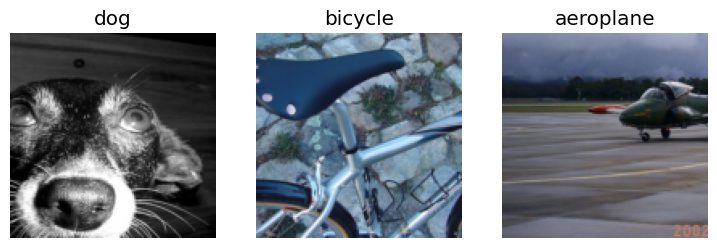

In [38]:
dls.show_batch(nrows=1, ncols=3)

In [39]:
learn = vision_learner(dls, resnet18)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 63.2MB/s]


In [40]:
dls.train.one_batch()

(TensorImage([[[[-1.9980, -2.0152, -2.0152,  ..., -1.8439, -1.9980, -1.9124],
                [-1.9980, -1.9980, -1.9980,  ..., -1.9467, -1.9124, -1.6042],
                [-1.9980, -1.9980, -2.0323,  ..., -1.9295, -1.6384, -0.8678],
                ...,
                [-1.1247, -1.1247, -1.1075,  ..., -1.4158, -1.4158, -1.4158],
                [-1.1589, -1.1418, -1.1075,  ..., -1.4329, -1.4500, -1.4500],
                [-1.1760, -1.1418, -1.1418,  ..., -1.4329, -1.4843, -1.4672]],
 
               [[-1.9132, -1.9307, -1.9482,  ..., -1.7556, -1.9132, -1.8606],
                [-1.9132, -1.9132, -1.9307,  ..., -1.8782, -1.8431, -1.6155],
                [-1.9132, -1.9132, -1.9307,  ..., -1.8606, -1.6681, -1.0553],
                ...,
                [-1.7556, -1.7556, -1.7381,  ..., -1.8081, -1.8431, -1.8431],
                [-1.7731, -1.7556, -1.7381,  ..., -1.8431, -1.8431, -1.8431],
                [-1.7731, -1.7556, -1.7556,  ..., -1.8431, -1.8431, -1.8256]],
 
               [

In [41]:
to_cpu(dls.train.one_batch())

(TensorImage([[[[ 0.1254,  0.1597,  0.1768,  ..., -0.1143, -0.0972, -0.0629],
                [ 0.1083,  0.1254,  0.1597,  ..., -0.0972, -0.0972, -0.0972],
                [ 0.1254,  0.1597,  0.1597,  ..., -0.0287,  0.0056,  0.0398],
                ...,
                [-0.4397, -0.0801, -0.1486,  ..., -0.1486, -0.1828, -0.1314],
                [-0.2171, -0.1999, -0.9363,  ..., -0.3541, -0.1486,  0.0398],
                [-0.7822, -0.8849, -1.2445,  ..., -0.8849, -0.5767, -0.2513]],
 
               [[ 0.9230,  0.9580,  0.9580,  ...,  0.7129,  0.7129,  0.7304],
                [ 0.8704,  0.9055,  0.9405,  ...,  0.7654,  0.7304,  0.7654],
                [ 0.8704,  0.8704,  0.8880,  ...,  0.8179,  0.8179,  0.8004],
                ...,
                [ 0.2927,  0.6779,  0.5028,  ...,  0.6254,  0.6954,  0.7129],
                [ 0.5903,  0.3978, -0.5126,  ...,  0.1702,  0.4153,  0.6078],
                [-0.2325, -0.4251, -0.9853,  ..., -0.5126, -0.1975,  0.1001]],
 
               [

In [42]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [43]:
activs[0]

TensorImage([-0.4873, -0.3461,  0.2240, -1.4665, -0.7282, -3.0370, -0.7969, -2.0043,  1.1887,  0.9765, -1.2437, -1.3605, -4.0315,  2.9481, -1.0752,  0.0476, -0.2246, -0.3476, -1.1642,  0.0104],
            grad_fn=<AliasBackward0>)

In [47]:
dls.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']